# Importing Line

In [1]:

import numpy as np
import pandas as pd
from pathlib import Path
import gc


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp

# BBStudies
import sys
sys.path.append('/Users/pbelanger/ABPLocal/BBStudies')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as tune
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Base as phys
import BBStudies.Physics.Constants as cst

# JOB imports
from main import user_specific_tasks


# Load collider and install collimators
collider = user_specific_tasks( config_path       = "config.yaml",
                                collider_path     = "../001_configure_collider/zfruits/collider_001.json",
                                collider_out_path = None,
                                collider          = None)
twiss_full = {}
twiss_full['lhcb1'] = collider['lhcb1'].twiss().to_pandas()
twiss_full['lhcb2'] = collider['lhcb2'].twiss().reverse().to_pandas()

# Filtering twiss to get rid of slices
twiss = {}
for sequence in ['lhcb1','lhcb2']:
    twiss[sequence] = xPlus.filter_twiss(twiss_full[sequence].set_index('name'),entries=['drift','..','_entry','_exit']).reset_index()



Loading collider...
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Installing collimators...
Installing tcp.d6l7.b1 in lhcb1...
Installing tcp.c6l7.b1 in lhcb1...
Installing tcp.b6l7.b1 in lhcb1...
Installing tcp.d6r7.b2 in lhcb2...
Installing tcp.c6r7.b2 in lhcb2...
Installing tcp.b6r7.b2 in lhcb2...
Compiling ContextCpu kernels...


caaf5272b2604556bdd3119505a41ca9.c:5035:11: warning: '_GNU_SOURCE' macro redefined [-Wmacro-redefined]
#  define _GNU_SOURCE // enable GNU libc NAN extension if possible
          ^
/Users/pbelanger/ABPLocal/BBStudies/Executables/miniforge3/envs/py-BB/include/python3.11/pyconfig.h:1690:10: note: previous definition is here
# define _GNU_SOURCE 1
         ^
caaf5272b2604556bdd3119505a41ca9.c:18266:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
caaf5272b2604556bdd3119505a41ca9.c:18532:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
caaf5272b2604556bdd3119505a41ca9.c:18620:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
caaf5272b26045

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


92631357c6514561971657f0b0ba9749.c:5035:11: warning: '_GNU_SOURCE' macro redefined [-Wmacro-redefined]
#  define _GNU_SOURCE // enable GNU libc NAN extension if possible
          ^
/Users/pbelanger/ABPLocal/BBStudies/Executables/miniforge3/envs/py-BB/include/python3.11/pyconfig.h:1690:10: note: previous definition is here
# define _GNU_SOURCE 1
         ^
92631357c6514561971657f0b0ba9749.c:18266:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
92631357c6514561971657f0b0ba9749.c:18532:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
92631357c6514561971657f0b0ba9749.c:18620:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
92631357c65145

Done compiling ContextCpu kernels.


In [4]:
[name for name in twiss['lhcb1'].name if '_aper' in name]

['tcp.d6l7.b1_aper', 'tcp.c6l7.b1_aper', 'tcp.b6l7.b1_aper']

In [12]:
collider['lhcb1'].element_dict['tcp.c6l7.b1_aper']

LimitPolygon(x_vertices=[ 0.001301  0.001301 -0.001301 -0.001301], y_vertices=[-1.  1.  1. -1.], x_normal=[-1. -0.  1. -0.], y_normal=[ 0. -1.  0.  1.], resc_fac=2.0)

---
# Plotting Collimator settings
---

Text(0.5, 0, 'x [m]')

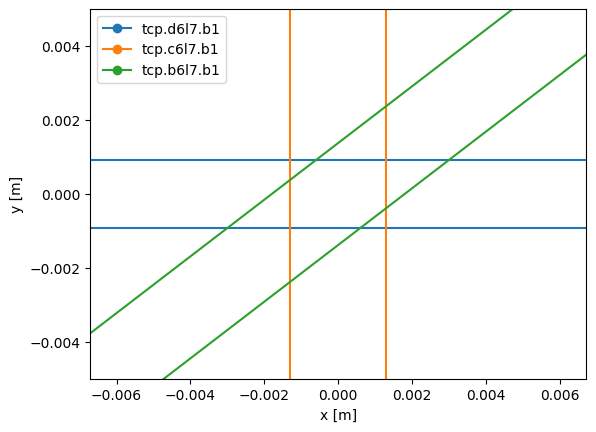

In [2]:
import matplotlib.pyplot as plt

from main import read_configuration, collimator

# Loading config
config_collimators = read_configuration(config_path='config.yaml')


# Creating collimator objects
apertures = {}
for name,info in config_collimators['collimators'].items():
    apertures[name] = collimator(gap = info['gap'],tilt=info['tilt'],center=[0,0])



plt.figure()
ee = apertures['tcp.d6l7.b1'].element
plt.plot(ee.x_vertices,ee.y_vertices,'-o',label='tcp.d6l7.b1')

ee = apertures['tcp.c6l7.b1'].element
plt.plot(ee.x_vertices,ee.y_vertices,'-o',label='tcp.c6l7.b1')

ee = apertures['tcp.b6l7.b1'].element
plt.plot(ee.x_vertices,ee.y_vertices,'-o',label='tcp.b6l7.b1')

plt.legend()
plt.axis('equal')
plt.xlim([-5e-3,5e-3])
plt.ylim([-5e-3,5e-3])

plt.ylabel('y [m]')
plt.xlabel('x [m]')

